### Time Resolved Photoluminescence Modeling

In a TRPL experiment the sample is hitted by a laser pulse of a very short time (picoseconds) which generates a first excess carrier density *n(0)*. This value decays in time due to charge recombination processes happening in the material.
The overall decay of the excess carrier density results in a exponential decay curve that is normally fitted with a multiple exponential. But the main limitation is that lifetime constants are extrapoleted by these fitting curve which do not explain precisely the physical processes which play simultaneously a role in the decay dynamics. 

For these reasons, we want to analyze in details the processes of generation and recombination of charges that happen after excitation to find the best and most precise way to get information on carrier recombination processes.

We start from the continuity equation which describe the number of photogenerated excess carrier in time:

$\frac{\delta(n)}{\delta(t)} = - R_1(z,t) - R_2(z,t)$

* $R_1$ is the recombination constant associated with Shockley Read Hall (SRH) recombination

$R_1 = \frac{(n_0 + n)(p_0 + p) - n_i^2}{(n_0 + n) + (p_0 + p) + 2n_icosh\frac{(E_i - E_t)}{kT}} \sigma \nu_{th} N_t$

* $R_2$ is the recombination rate associated with the band-to-band recombination (bimolecular process)


LLI
$R_2(z, t) = k_2[p(p_0)]$

HLI
$R_2(z, t) = k_2[p^2]$

The Auger recombination is negligible under the normal working condition of solar cells (below an excess carrier density of $10^{17} cm^{−3}$ )

* **Low Level Injection regime: $n=p<<p_0$**

Under low injection level (LLI) conditions, the photocarrier
density *n* is much lower than the equilibrium density of the
majority carriers; $R_1$ can be expressed as a linear function of the
photocarrier density *n(z,t)*. 
Approximation:

$R_1 = k_1n(z,t)$

Where $k_1$ is the SRH recombination frequency(?=constant?)

Approximation of $R_2$:

$R_2 = k_2p_0p$

**Continuity equation at LLI**

$\frac{\delta(n)}{\delta(t)} = -(k_1 + k_2p_0)p$

$k_2p_0$ is non-negligible only if the
absorbing layer is highly doped 
($k1 = 10^7 s^{−1}$ and $k_2 = 10^{−10} \frac{cm^3}{s}, p_0 > 10^{17} cm^{−3}$). 
Therefore, under LLI conditions and low doping concentration, the decay of the photogenerated carriers is mainly controlled by the SRH recombination rate $k_1$

**Continuity equation at HLI**

$\frac{\delta(n)}{\delta(t)} = -(k'_1 + k_2p_0)p - k_2p^2$  

where $k'_1$ 

Approximation of the existance of only deep level traps:

**LLI** : $\frac{\delta(n)}{\delta(t)} = -(k_1 + k_2p_0)p - k_2p^2$ 

**HLI** : $\frac{\delta(n)}{\delta(t)} = -(\frac{k_1}{2} + k_2p_0)p - k_2p^2$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
# HLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_HLI(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    pl_HLI = k2 * (n**2)
    return pl_HLI

In [45]:
# LLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_LLI(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    p0 = 3e15
    pl_LLI = k2 * n* p0
    return pl_LLI

In [5]:
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_HLI = photoluminescence_HLI(t = np.linspace(0,10000, 5000)*1e-9, k1= np.logspace(6, 7, 50))
pl_HLI

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.99185516e+18, 1.99147179e+18, 1.99107006e+18, ...,
        1.92831909e+18, 1.92494323e+18, 1.92141130e+18],
       [1.98374381e+18, 1.98298029e+18, 1.98218034e+18, ...,
        1.85920993e+18, 1.85270602e+18, 1.84591361e+18],
       ...,
       [3.99407156e+09, 1.52918315e+09, 5.58945355e+08, ...,
        1.77746634e-46, 1.58799456e-45, 1.47314550e-45],
       [3.97812398e+09, 1.52278426e+09, 5.56494156e+08, ...,
        2.07475164e-46, 1.43832289e-45, 3.84874755e-45],
       [3.96224008e+09, 1.51641215e+09, 5.54053706e+08, ...,
        2.37917690e-46, 1.26836482e-45, 7.48218435e-45]])

In [6]:
pl_HLI.shape

(5000, 50)

In [7]:
#x values of time
t = np.linspace(0,10000, 5000)*1e-9
t

array([0.00000000e+00, 2.00040008e-09, 4.00080016e-09, ...,
       9.99599920e-06, 9.99799960e-06, 1.00000000e-05])

In [8]:
#weighted sum of photoluminescence data
pl_HLI_sum = pl_HLI.sum(axis=0)
pl_HLI_sum.size

50

In [9]:
#weighted average og the photoluminescence data
pl_HLI_avg = np.average(pl_HLI, weights=pl_HLI_sum, axis=-1)
pl_HLI_avg.size

5000

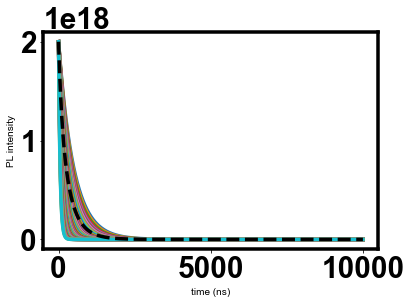

In [10]:
#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_HLI)
plt.plot(t*1e9, pl_HLI_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [15]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 239.8583199344003
Beta = 0.8127104815114674
avg. tau (ns) = 268.7640888149038


In [16]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 414.978687815306
a1 = 0.4717908115582276
tau2 (ns) = 161.88672764735415
a2 = 0.5011229625870983
avg. tau (ns) = 284.61750241862865


In [17]:
#triple exponential fitting of the average PL exponential decay
triple_exp = triple_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 258.6574714101677
a1 = 0.43806742705899976
tau2 (ns) = 449.11932877741054
a2 = 0.3108120332927263
tau3 (ns) = 96.59112667536843
a3 (ns) = 0.24803230675026733
avg. tau (ns) = 277.71647788282553


In [18]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 346.2113908818496
a = 0.807121489336123
avg. tau (ns) = 346.2113908818496


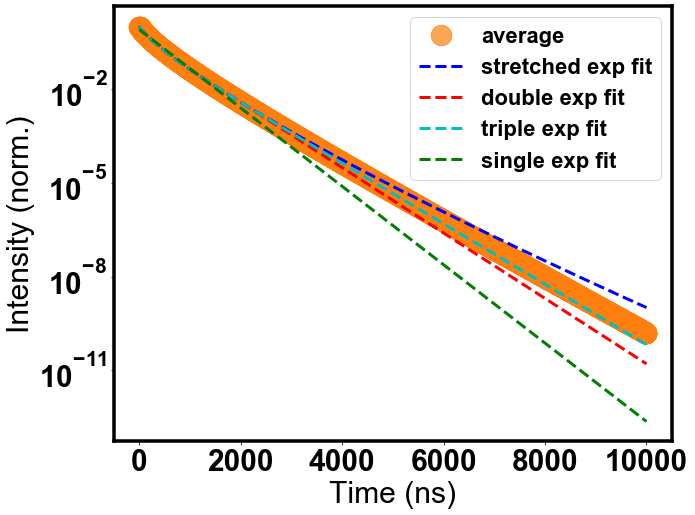

In [19]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_HLI_avg/np.max(pl_HLI_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Calculation of theoretical tau  
$I = I_0e^{(\frac{-t}{\tau})}$ when t = $\tau$ and $I = \frac{I_0}{e}$

In [20]:
PL_e_HLI = np.max(pl_HLI, axis=0)/np.e
PL_e_HLI.size

50

In [21]:
#function to calulate the index of the PL/e values in the "pl" database by looking at the nearest neighbor of the "PL_e_values" inside "pl"
def find_idx(array, value):
    return (np.abs(array - value)).argmin()

In [22]:
# index of PL data calculated considering each array inside the array of pl singularly
time_PL_HLI = np.array([])
for ix, i in enumerate(PL_e_HLI):
    b = find_idx(pl_HLI[:, ix], i)
    time_PL_HLI = np.append(time_PL_HLI, b)
time_PL_HLI

array([246., 235., 224., 214., 204., 195., 186., 178., 170., 162., 155.,
       148., 141., 135., 128., 123., 117., 112., 107., 102.,  97.,  93.,
        88.,  84.,  81.,  77.,  73.,  70.,  67.,  64.,  61.,  58.,  55.,
        53.,  50.,  48.,  46.,  44.,  42.,  40.,  38.,  36.,  35.,  33.,
        32.,  30.,  29.,  27.,  26.,  25.])

In [23]:
# array of lifetime at which PL=PL0/e
lifetime_HLI = np.array([])
for i in time_PL_HLI:
    lifetime_HLI = np.append(lifetime_HLI, t[int(i)]) 
lifetime_HLI*1e9

array([492.09841968, 470.0940188 , 448.08961792, 428.08561712,
       408.08161632, 390.0780156 , 372.07441488, 356.07121424,
       340.0680136 , 324.06481296, 310.0620124 , 296.05921184,
       282.05641128, 270.0540108 , 256.05121024, 246.04920984,
       234.04680936, 224.04480896, 214.04280856, 204.04080816,
       194.03880776, 186.03720744, 176.03520704, 168.03360672,
       162.03240648, 154.03080616, 146.02920584, 140.0280056 ,
       134.02680536, 128.02560512, 122.02440488, 116.02320464,
       110.0220044 , 106.02120424, 100.020004  ,  96.01920384,
        92.01840368,  88.01760352,  84.01680336,  80.0160032 ,
        76.01520304,  72.01440288,  70.0140028 ,  66.01320264,
        64.01280256,  60.0120024 ,  58.01160232,  54.01080216,
        52.01040208,  50.010002  ])

In [26]:
avg_lifetime_HLI = np.average(lifetime_HLI, weights=pl_HLI_sum, axis=-1)
avg_lifetime_HLI*1e9

276.4283546704363

<BarContainer object of 1 artists>

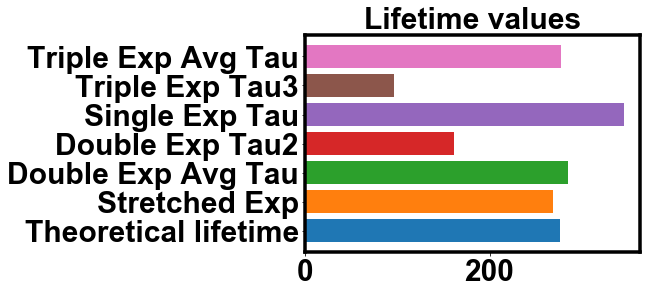

In [28]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", avg_lifetime_HLI*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)
plt.barh("Double Exp Tau2", double_exp[2]*1e9)
plt.barh("Single Exp Tau", single_exp[2]*1e9)
plt.barh("Triple Exp Tau3", triple_exp[4]*1e9)
plt.barh("Triple Exp Avg Tau", triple_exp[6]*1e9)

### Low Level Injection 

In [46]:
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_LLI = photoluminescence_LLI(t = np.linspace(0,10000, 5000)*1e-9, k1= np.logspace(6, 7, 50))
pl_LLI

array([[ 6.00000000e+19,  6.00000000e+19,  6.00000000e+19, ...,
         6.00000000e+19,  6.00000000e+19,  6.00000000e+19],
       [ 5.98777028e+19,  5.98719402e+19,  5.98659010e+19, ...,
         5.89149757e+19,  5.88633827e+19,  5.88093558e+19],
       [ 5.97556597e+19,  5.97441588e+19,  5.97321070e+19, ...,
         5.78496143e+19,  5.77483406e+19,  5.76423845e+19],
       ...,
       [ 2.68129238e+15,  1.65907495e+15,  1.00304618e+15, ...,
         5.65635874e-13, -1.69067744e-12, -1.62839243e-12],
       [ 2.67593407e+15,  1.65560010e+15,  1.00084438e+15, ...,
         6.11109888e-13, -1.60903114e-12, -2.63206109e-12],
       [ 2.67058648e+15,  1.65213252e+15,  9.98647421e+14, ...,
         6.54409537e-13, -1.51097872e-12, -3.66986809e-12]])

In [47]:
#weighted sum of photoluminescence data
pl_LLI_sum = pl_LLI.sum(axis=0)
pl_LLI_sum

array([2.97266767e+22, 2.83767528e+22, 2.70874737e+22, 2.58562243e+22,
       2.46804775e+22, 2.35577981e+22, 2.24858443e+22, 2.14623682e+22,
       2.04852145e+22, 1.95523181e+22, 1.86617024e+22, 1.78114755e+22,
       1.69998277e+22, 1.62250284e+22, 1.54854224e+22, 1.47794276e+22,
       1.41055312e+22, 1.34622874e+22, 1.28483142e+22, 1.22622909e+22,
       1.17029552e+22, 1.11691011e+22, 1.06595762e+22, 1.01732796e+22,
       9.70915919e+21, 9.26621024e+21, 8.84347280e+21, 8.44002995e+21,
       8.05500591e+21, 7.68756420e+21, 7.33690595e+21, 7.00226823e+21,
       6.68292246e+21, 6.37817289e+21, 6.08735517e+21, 5.80983493e+21,
       5.54500647e+21, 5.29229146e+21, 5.05113776e+21, 4.82101820e+21,
       4.60142952e+21, 4.39189126e+21, 4.19194475e+21, 4.00115215e+21,
       3.81909549e+21, 3.64537578e+21, 3.47961220e+21, 3.32144120e+21,
       3.17051581e+21, 3.02650483e+21])

In [48]:
#weighted average og the photoluminescence data
pl_LLI_avg = np.average(pl_LLI, weights=pl_LLI_sum, axis=-1)
pl_LLI_avg

array([6.00000000e+19, 5.96933502e+19, 5.93891253e+19, ...,
       3.16897284e+14, 3.16223487e+14, 3.15551132e+14])

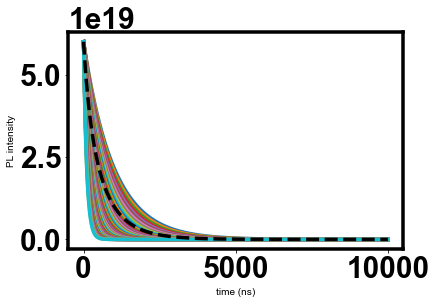

In [49]:
#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_LLI)
plt.plot(t*1e9, pl_LLI_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [50]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 480.96316294020414
Beta = 0.8121996745349133
avg. tau (ns) = 539.1592745562173


In [51]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 321.86434125866475
a1 = 0.49686101378437186
tau2 (ns) = 830.4990582829884
a2 = 0.4765466558480554
avg. tau (ns) = 570.8742689672604


In [52]:
#triple exponential fitting of the average PL exponential decay
triple_exp = triple_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 191.77855909955136
a1 = 0.24376564923768873
tau2 (ns) = 896.2803257790575
a2 = 0.32102780819917937
tau3 (ns) = 511.7157107685513
a3 (ns) = 0.4321997061197576
avg. tau (ns) = 557.3190806188915


In [53]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 694.566063715196
a = 0.8070126642444346
avg. tau (ns) = 694.566063715196


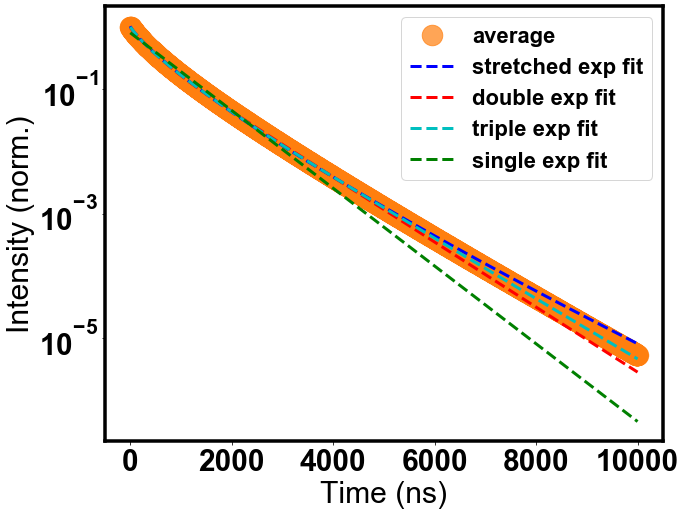

In [54]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [56]:
#photoluminescence maximum from LLI regime divided by e
PL_e_LLI = np.max(pl_LLI, axis=0)/np.e
PL_e_LLI.size

50

In [57]:
# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_LLI = np.array([])
for ix, i in enumerate(PL_e_LLI):
    b = find_idx(pl_LLI[:, ix], i)
    time_PL_LLI = np.append(time_PL_LLI, b)
time_PL_LLI

array([494., 471., 450., 429., 410., 391., 374., 357., 340., 325., 310.,
       296., 282., 270., 257., 246., 234., 224., 213., 204., 194., 185.,
       177., 169., 161., 154., 147., 140., 134., 128., 122., 116., 111.,
       106., 101.,  96.,  92.,  88.,  84.,  80.,  76.,  73.,  69.,  66.,
        63.,  60.,  57.,  55.,  52.,  50.])

In [58]:
# array of lifetime at which PL=PL0/e at LLI
lifetime_LLI = np.array([])
for i in time_PL_LLI:
    lifetime_LLI = np.append(lifetime_LLI, t[int(i)]) 
lifetime_LLI*1e9

array([988.19763953, 942.18843769, 900.18003601, 858.17163433,
       820.16403281, 782.15643129, 748.14962993, 714.14282857,
       680.13602721, 650.13002601, 620.1240248 , 592.11842368,
       564.11282256, 540.1080216 , 514.10282056, 492.09841968,
       468.09361872, 448.08961792, 426.08521704, 408.08161632,
       388.07761552, 370.0740148 , 354.07081416, 338.06761352,
       322.06441288, 308.06161232, 294.05881176, 280.0560112 ,
       268.05361072, 256.05121024, 244.04880976, 232.04640928,
       222.04440888, 212.04240848, 202.04040808, 192.03840768,
       184.03680736, 176.03520704, 168.03360672, 160.0320064 ,
       152.03040608, 146.02920584, 138.02760552, 132.02640528,
       126.02520504, 120.0240048 , 114.02280456, 110.0220044 ,
       104.02080416, 100.020004  ])

In [60]:
#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_LLI = np.average(lifetime_LLI, weights=pl_LLI_sum, axis=-1)
avg_lifetime_LLI*1e9

554.681138789296

<BarContainer object of 1 artists>

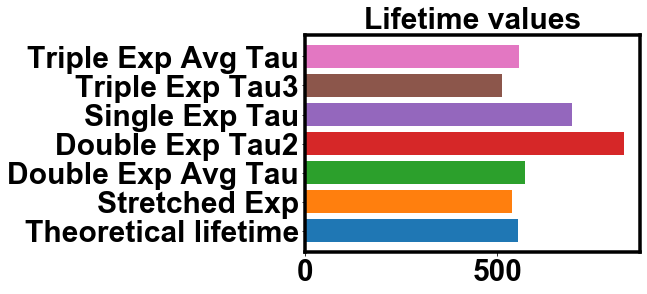

In [61]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", avg_lifetime_LLI*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)
plt.barh("Double Exp Tau2", double_exp[2]*1e9)
plt.barh("Single Exp Tau", single_exp[2]*1e9)
plt.barh("Triple Exp Tau3", triple_exp[4]*1e9)
plt.barh("Triple Exp Avg Tau", triple_exp[6]*1e9)

### k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [51]:
# skewed gaussian distribution of k1 values
# search for log spaced skewed distribution
skew = skewnorm.rvs(a = 10, loc = 1e6, scale=1e7, size=200)

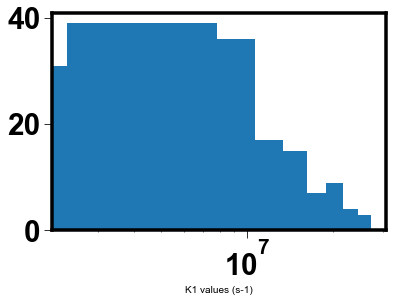

In [52]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [53]:
pl_skew = photoluminescence_HLI(k1= skew, t=np.linspace(0,10000, 200)*1e-9)
pl_skew

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.20573244e+18, 1.61231481e+18, 9.81435819e+17, ...,
        1.79906134e+18, 5.83371749e+17, 1.01056130e+18],
       [7.27183894e+17, 1.30003241e+18, 4.81852053e+17, ...,
        1.61847416e+18, 1.70278752e+17, 5.10868492e+17],
       ...,
       [1.42245224e-25, 1.04865735e+00, 3.44468698e-43, ...,
        2.47193313e+09, 1.04042524e-87, 1.09671617e-40],
       [8.59072335e-26, 8.46995332e-01, 1.69322734e-43, ...,
        2.22793702e+09, 3.03924583e-88, 5.55093004e-41],
       [5.18826070e-26, 6.84113919e-01, 8.32302127e-44, ...,
        2.00802494e+09, 8.87834977e-89, 2.80955427e-41]])

In [54]:
skew_sum = pl_skew.sum(axis=-1)

In [55]:
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)

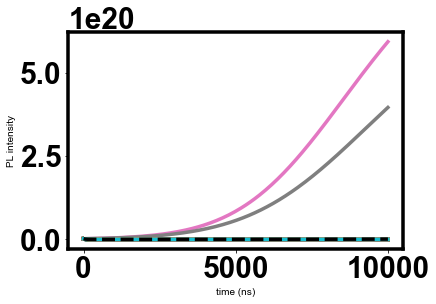

In [56]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [58]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 1641.3900305855666
Beta = 7.889627224949569e-05
avg. tau (ns) = inf


In [152]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 54.95239837183218
a1 = 0.7432357679233969
tau2 (ns) = 349.0760257988583
a2 = 0.22206439569434339
avg. tau (ns) = 122.6146531250338


In [153]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

tau1 (ns) = 35.54935948485746
a1 = 0.5381440151839263
tau2 (ns) = 475.336004691705
a2 = 0.12190282123331198
tau3 (ns) = 128.33734742242396
a3 (ns) = 0.3382912251554521
avg. tau (ns) = 120.69145531625837


In [154]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 211.0975714929115
a = 0.6039147413326522
avg. tau (ns) = 211.0975714929115


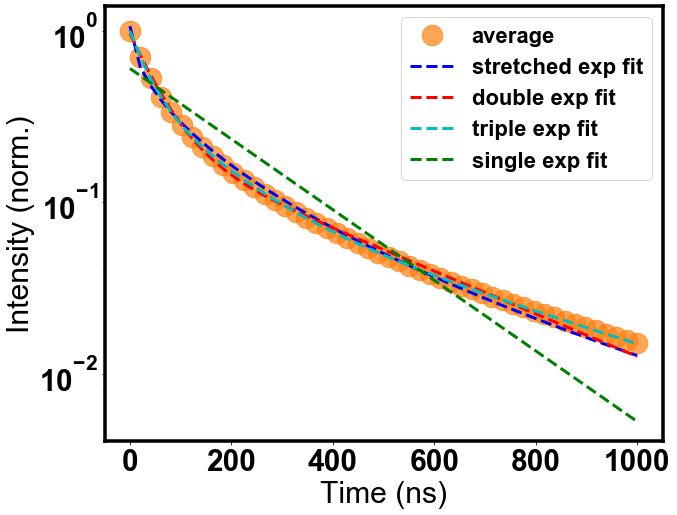

In [155]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [156]:
#calculating the PL/e of the skew pl distribution
skew_PL_e = PL_e(pl_skew)
skew_PL_e

array([7.35758882e+17, 7.10257093e+17, 6.85648906e+17, 6.61902511e+17,
       6.38987253e+17, 6.16873594e+17, 5.95533068e+17, 5.74938243e+17,
       5.55062678e+17, 5.35880892e+17, 5.17368326e+17, 4.99501305e+17,
       4.82257010e+17, 4.65613446e+17, 4.49549407e+17, 4.34044451e+17,
       4.19078872e+17, 4.04633670e+17, 3.90690526e+17, 3.77231779e+17,
       3.64240398e+17, 3.51699963e+17, 3.39594639e+17, 3.27909159e+17,
       3.16628798e+17, 3.05739357e+17, 2.95227142e+17, 2.85078946e+17,
       2.75282032e+17, 2.65824116e+17, 2.56693348e+17, 2.47878302e+17,
       2.39367952e+17, 2.31151666e+17, 2.23219186e+17, 2.15560620e+17,
       2.08166421e+17, 2.01027383e+17, 1.94134622e+17, 1.87479570e+17,
       1.81053958e+17, 1.74849809e+17, 1.68859429e+17, 1.63075391e+17,
       1.57490532e+17, 1.52097939e+17, 1.46890943e+17, 1.41863106e+17,
       1.37008219e+17, 1.32320289e+17])

In [157]:
# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(skew_PL_e):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

array([ 0., 14., 19.,  1., 47., 37., 11.,  6., 17.,  7., 34.,  2.,  2.,
        2., 15., 15., 15., 21., 21.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
       29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 43., 43.,
       43., 43., 43., 43., 43., 32., 32., 32., 32., 32., 32.])

In [158]:
# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

array([  0.        , 285.71428571, 387.75510204,  20.40816327,
       959.18367347, 755.10204082, 224.48979592, 122.44897959,
       346.93877551, 142.85714286, 693.87755102,  40.81632653,
        40.81632653,  40.81632653, 306.12244898, 306.12244898,
       306.12244898, 428.57142857, 428.57142857, 102.04081633,
       102.04081633, 102.04081633, 102.04081633, 102.04081633,
       102.04081633, 102.04081633, 591.83673469, 591.83673469,
       591.83673469, 591.83673469, 591.83673469, 591.83673469,
       591.83673469, 591.83673469, 591.83673469, 591.83673469,
       591.83673469, 877.55102041, 877.55102041, 877.55102041,
       877.55102041, 877.55102041, 877.55102041, 877.55102041,
       653.06122449, 653.06122449, 653.06122449, 653.06122449,
       653.06122449, 653.06122449])

In [159]:
lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

309.6267513689105

Calculating lifetime at PL/e for average curve

In [160]:
#PL value at lifetime from the maximum of the average curve divided by e
PL_skew_avg_e= np.max(pl_skew_avg)/np.e
PL_skew_avg_e

7.357588823428847e+17

In [161]:
# calculation of lifetime corresponding to PL0/e
lifetime_skew_avg_curve= t[(find_idx(pl_skew_avg, PL_skew_avg_e))]
lifetime_skew_avg_curve*1e9

81.63265306122449

<BarContainer object of 1 artists>

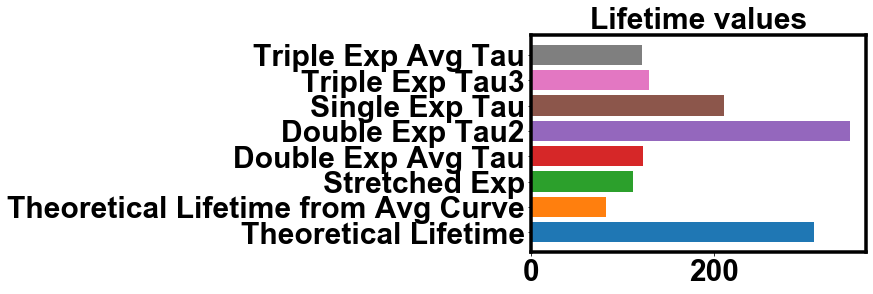

In [162]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical Lifetime", lifetime_skew_avg*1e9)
plt.barh("Theoretical Lifetime from Avg Curve", lifetime_skew_avg_curve*1e9)
plt.barh("Stretched Exp", stretched_exp_skew[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp_skew[4]*1e9)
plt.barh("Double Exp Tau2", double_exp_skew[2]*1e9)
plt.barh("Single Exp Tau", single_exp_skew[2]*1e9)
plt.barh("Triple Exp Tau3", triple_exp_skew[4]*1e9)
plt.barh("Triple Exp Avg Tau", triple_exp_skew[6]*1e9)

In [90]:
skew = skewnorm.rvs(a = 20, loc = 1e6, scale=1e7, size=50)

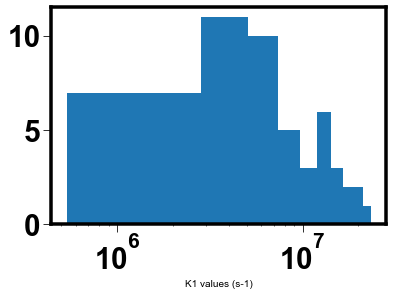

In [91]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [ ]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 14), 50), t = np.linspace(0,1000)*1e-9)

In [ ]:
pl_skew_avg = pl_average(pl_skew)

In [ ]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)